In [4]:
!pip install yfinance

You should consider upgrading via the 'C:\Users\Devve\Documents\Jupyter Notebooks\venv\Scripts\python.exe -m pip install --upgrade pip' command.


In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf
from datetime import datetime

# Data Collection

In [6]:
now = datetime.now()

ticker = 'AAPL'
start = datetime(now.year - 10, now.month, now.day)
end = now
df = yf.download(ticker, start, end)
df

C:\Users\Devve\AppData\Local\Temp\ipykernel_8776\3688926054.py:6: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(ticker, start, end)
[*********************100%***********************]  1 of 1 completed


Price,Close,High,Low,Open,Volume
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL
Date,,,,,
2015-09-28,25.268147,25.746811,25.268147,25.585009,208436000
2015-09-29,24.508570,25.508600,24.238900,25.355786,293461600
2015-09-30,24.787233,25.065893,24.434414,24.758018,265892000
2015-10-01,24.625431,24.634420,24.115303,24.510821,255716400
2015-10-02,24.805212,24.946790,24.169240,24.272613,232079200
...,...,...,...,...,...
2025-09-22,256.079987,256.640015,248.119995,248.300003,105517400
2025-09-23,254.429993,257.339996,253.580002,255.880005,60275200


# Data Exploration

In [7]:
df.shape

(2515, 5)

In [8]:
df.isna().sum()

Price   Ticker
Close   AAPL      0
High    AAPL      0
Low     AAPL      0
Open    AAPL      0
Volume  AAPL      0
dtype: int64

In [9]:
df.describe()

Price,Close,High,Low,Open,Volume
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL
count,2515.000000,2515.000000,2515.000000,2515.000000,2.515000e+03
mean,108.004289,109.081863,106.810108,107.897381,1.052872e+08
std,70.241965,70.922030,69.469362,70.159100,5.921642e+07
min,20.624056,20.927682,20.425441,20.546432,2.323470e+07
25%,40.524128,40.874712,40.248421,40.549182,6.484330e+07
50%,112.212730,113.739905,110.819305,112.339175,9.145490e+07
75%,168.677979,170.138976,167.137962,168.375866,1.289338e+08
max,258.103729,259.179926,256.718662,257.276679,5.334788e+08


In [10]:
df.dtypes

Price   Ticker
Close   AAPL      float64
High    AAPL      float64
Low     AAPL      float64
Open    AAPL      float64
Volume  AAPL        int64
dtype: object

In [11]:
df = df.reset_index()

In [12]:
df.head()

Price,Date,Close,High,Low,Open,Volume
Ticker,,AAPL,AAPL,AAPL,AAPL,AAPL
0,2015-09-28,25.268147,25.746811,25.268147,25.585009,208436000
1,2015-09-29,24.508570,25.508600,24.238900,25.355786,293461600
2,2015-09-30,24.787233,25.065893,24.434414,24.758018,265892000
3,2015-10-01,24.625431,24.634420,24.115303,24.510821,255716400
4,2015-10-02,24.805212,24.946790,24.169240,24.272613,232079200


Text(0, 0.5, 'CLose Price')

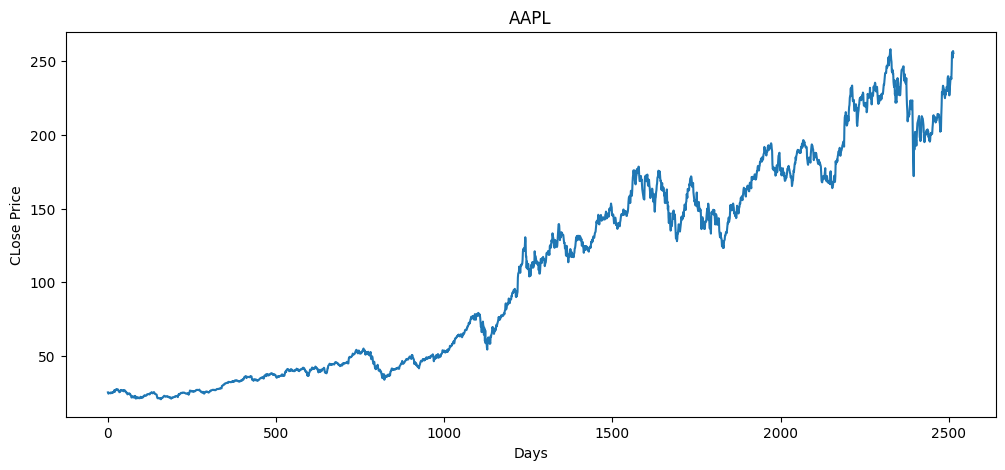

In [13]:
plt.figure(figsize=(12,5))
plt.plot(df.Close)
plt.title(ticker)
plt.xlabel('Days')
plt.ylabel('CLose Price')

# Feature Engineering

### 100 days moving average

In [14]:
df['MA_100'] = df.Close.rolling(100).mean()
df.head(103)

Price,Date,Close,High,Low,Open,Volume,MA_100
Ticker,,AAPL,AAPL,AAPL,AAPL,AAPL,
0,2015-09-28,25.268147,25.746811,25.268147,25.585009,208436000,NaN
1,2015-09-29,24.508570,25.508600,24.238900,25.355786,293461600,NaN
2,2015-09-30,24.787233,25.065893,24.434414,24.758018,265892000,NaN
3,2015-10-01,24.625431,24.634420,24.115303,24.510821,255716400,NaN
4,2015-10-02,24.805212,24.946790,24.169240,24.272613,232079200,NaN
...,...,...,...,...,...,...,...
98,2016-02-18,21.842566,22.439344,21.803989,22.427998,156084000,NaN
99,2016-02-19,21.792650,21.956027,21.738192,21.783574,141496800,24.478299
100,2016-02-22,21.983253,21.987793,21.765418,21.853914,137123200,24.445450


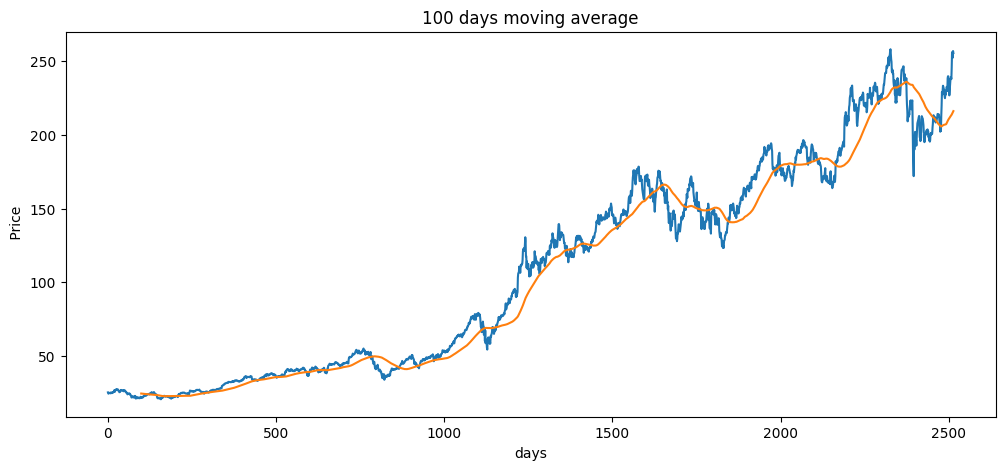

In [15]:
plt.figure(figsize=(12,5))
plt.plot(df.Close)
plt.title('100 days moving average')
plt.xlabel('days')
plt.ylabel(' Price')
plt.plot(df['MA_100'])

In [16]:
df['MA_200'] = df.Close.rolling(200).mean()

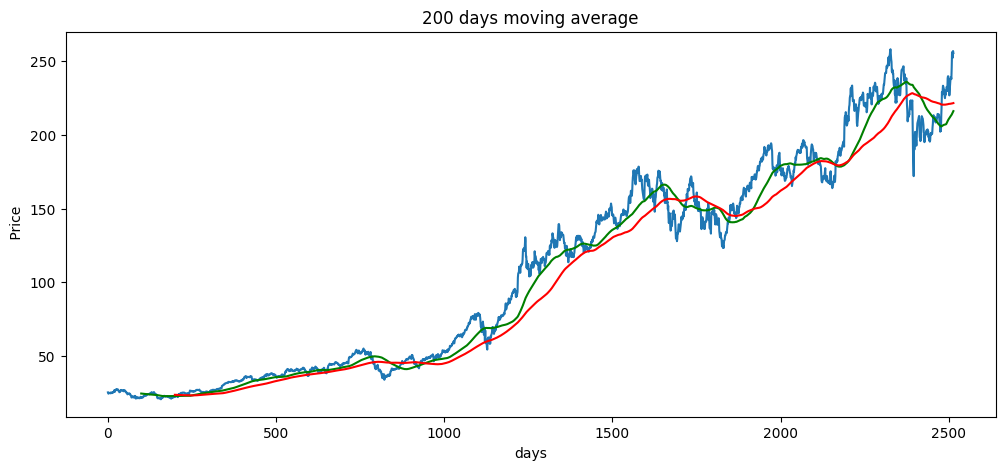

In [17]:
plt.figure(figsize=(12,5))
plt.plot(df.Close)
plt.title('200 days moving average')
plt.xlabel('days')
plt.ylabel(' Price')
plt.plot(df['MA_100'],'g')
plt.plot(df['MA_200'],'r')

### Calculating % changed in each trading session

In [18]:
df['Percentage Changed'] = df.Close.pct_change()
df[['Close','Percentage Changed']]

Price,Close,Percentage Changed
Ticker,AAPL,
0,25.268147,NaN
1,24.508570,-0.030061
2,24.787233,0.011370
3,24.625431,-0.006528
4,24.805212,0.007301
...,...,...
2510,256.079987,0.043096
2511,254.429993,-0.006443
2512,252.309998,-0.008332


# Data preprocessing

In [19]:
# Splitting data into training and testing

data_training = pd.DataFrame(df.Close[0:int(len(df) * 0.7)])
data_testing = pd.DataFrame(df.Close[int(len(df) * 0.7) : ])

print(data_training)
print(data_testing)

Ticker        AAPL
0        25.268147
1        24.508570
2        24.787233
3        24.625431
4        24.805212
...            ...
1755    148.358093
1756    152.079391
1757    154.461746
1758    151.331192
1759    150.366425

[1760 rows x 1 columns]
Ticker        AAPL
1760    148.092285
1761    148.427032
1762    149.401627
1763    147.511444
1764    140.265839
...            ...
2510    256.079987
2511    254.429993
2512    252.309998
2513    256.869995
2514    255.460007

[755 rows x 1 columns]


In [20]:
# Scaling down the data between 0 and 1
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))

In [21]:
data_training_array = scaler.fit_transform(data_training)

# Sequence Creation

In [22]:
x_train = []
y_train = []

for i in range(100, data_training_array.shape[0]):
    x_train.append(data_training_array[i - 100: i])
    y_train.append(data_training_array[i,0])

x_train, y_train = np.array(x_train), np.array(y_train)

In [23]:
x_train

array([[[0.02942668],
        [0.02461372],
        [0.02637943],
        ...,
        [0.01039523],
        [0.00772093],
        [0.00740465]],

       [[0.02461372],
        [0.02637943],
        [0.02535419],
        ...,
        [0.00772093],
        [0.00740465],
        [0.00861238]],

       [[0.02637943],
        [0.02535419],
        [0.02649335],
        ...,
        [0.00740465],
        [0.00861238],
        [0.00546359]],

       ...,

       [[0.84320123],
        [0.8871773 ],
        [0.84991864],
        ...,
        [0.81978743],
        [0.80937016],
        [0.83294968]],

       [[0.8871773 ],
        [0.84991864],
        [0.85184703],
        ...,
        [0.80937016],
        [0.83294968],
        [0.84804517]],

       [[0.84991864],
        [0.85184703],
        [0.8613014 ],
        ...,
        [0.83294968],
        [0.84804517],
        [0.82820882]]], shape=(1660, 100, 1))

In [24]:
y_train

array([0.00861238, 0.00546359, 0.00749083, ..., 0.84804517, 0.82820882,
       0.82209569], shape=(1660,))

# Model Building

In [25]:
import tensorflow as tf
print(tf.__version__)

2.20.0


In [26]:
# ML Model
from keras.models import Sequential
from keras.layers import Dense, LSTM, Input

In [27]:
# model = Sequential()

# model.add(Input(shape = (100, 1)))
# model.add(LSTM(units=128, activation='tanh', return_sequences=True))
# model.add(LSTM(units=64))
# model.add(Dense(25))
# model.add(Dense(1))

# Model Training

In [28]:
# model.compile(optimizer='adam', loss='mean_squared_error')
# model.fit(x_train, y_train, epochs = 50)

In [29]:
# model.summary()

In [30]:
#save the training model
# model.save('stock_prediction_model.keras')

In [32]:
from keras.models import load_model

model = load_model('stock_prediction_model.keras')

# Preparing test data

In [33]:
past_100_days = data_training.tail(100)

In [34]:
final_df = pd.concat([past_100_days, data_testing], ignore_index=True)
final_df

Ticker,AAPL
0,155.061752
1,156.553833
2,162.973892
3,153.893585
4,154.621078
...,...
850,256.079987
851,254.429993
852,252.309998
853,256.869995


In [35]:
input_data = scaler.fit_transform(final_df)
input_data

array([[2.35720532e-01],
       [2.46787542e-01],
       [2.94406188e-01],
       [2.27056042e-01],
       [2.32451981e-01],
       [1.94389093e-01],
       [2.12253739e-01],
       [1.53846385e-01],
       [1.25116862e-01],
       [1.58294466e-01],
       [1.46846615e-01],
       [1.73826195e-01],
       [1.12429497e-01],
       [8.71268605e-02],
       [8.88766897e-02],
       [1.29127515e-01],
       [1.09075045e-01],
       [1.10241899e-01],
       [1.34012799e-01],
       [1.76742652e-01],
       [1.70909285e-01],
       [1.69961428e-01],
       [1.88190956e-01],
       [1.45679987e-01],
       [1.51221471e-01],
       [1.69961428e-01],
       [1.64492603e-01],
       [1.25700403e-01],
       [8.55225769e-02],
       [4.72412575e-02],
       [5.36577129e-02],
       [7.31264160e-02],
       [3.39700123e-02],
       [4.49076615e-02],
       [7.63349832e-02],
       [7.25433282e-02],
       [9.38350861e-02],
       [1.18554635e-01],
       [1.18554635e-01],
       [8.77832869e-02],


In [36]:
x_test = []
y_test = []

for i in range(100, input_data.shape[0]):
    x_test.append(input_data[i - 100 : i] )
    y_test.append(input_data[i, 0])
x_test, y_test = np.array(x_test), np.array(y_test)

In [37]:
x_test

array([[[0.23572053],
        [0.24678754],
        [0.29440619],
        ...,
        [0.23127019],
        [0.20805035],
        [0.20089451]],

       [[0.24678754],
        [0.29440619],
        [0.22705604],
        ...,
        [0.20805035],
        [0.20089451],
        [0.18402684]],

       [[0.29440619],
        [0.22705604],
        [0.23245198],
        ...,
        [0.20089451],
        [0.18402684],
        [0.18650971]],

       ...,

       [[0.66396828],
        [0.60499776],
        [0.55719984],
        ...,
        [0.90651605],
        [0.98498956],
        [0.97275129]],

       [[0.60499776],
        [0.55719984],
        [0.55438807],
        ...,
        [0.98498956],
        [0.97275129],
        [0.95702693]],

       [[0.55719984],
        [0.55438807],
        [0.53766629],
        ...,
        [0.97275129],
        [0.95702693],
        [0.99084919]]], shape=(755, 100, 1))

In [38]:
y_test

array([1.84026836e-01, 1.86509712e-01, 1.93738439e-01, 1.79718641e-01,
       1.25976781e-01, 9.47246571e-02, 1.25757784e-01, 1.52409603e-01,
       1.54600483e-01, 1.47517415e-01, 1.08525231e-01, 1.10934995e-01,
       1.00419836e-01, 9.57468715e-02, 1.29700982e-01, 9.60390945e-02,
       1.25465674e-01, 1.35250163e-01, 1.36053380e-01, 1.32621627e-01,
       1.60952880e-01, 1.76870995e-01, 1.97973747e-01, 1.76141004e-01,
       1.42916997e-01, 2.22799796e-01, 2.05275586e-01, 1.85633383e-01,
       1.44596657e-01, 9.96899573e-02, 9.77151323e-02, 1.01664669e-01,
       1.05906882e-01, 7.20427465e-02, 1.59811037e-01, 1.80509748e-01,
       1.70123950e-01, 1.82996472e-01, 1.73853923e-01, 1.87970261e-01,
       1.92139135e-01, 1.68148898e-01, 1.84020271e-01, 1.90530098e-01,
       1.68880701e-01, 1.40429254e-01, 1.18121280e-01, 1.68295689e-01,
       1.70343400e-01, 1.66686312e-01, 1.58055776e-01, 1.30847692e-01,
       1.16439018e-01, 1.28945979e-01, 1.25362230e-01, 1.42403740e-01,
      

# Making predictions

In [39]:
y_predicted = model.predict(x_test)

24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step


In [40]:
y_predicted = scaler.inverse_transform(y_predicted.reshape(-1,1)).flatten()
y_test = scaler.inverse_transform(y_test.reshape(-1,1)).flatten()

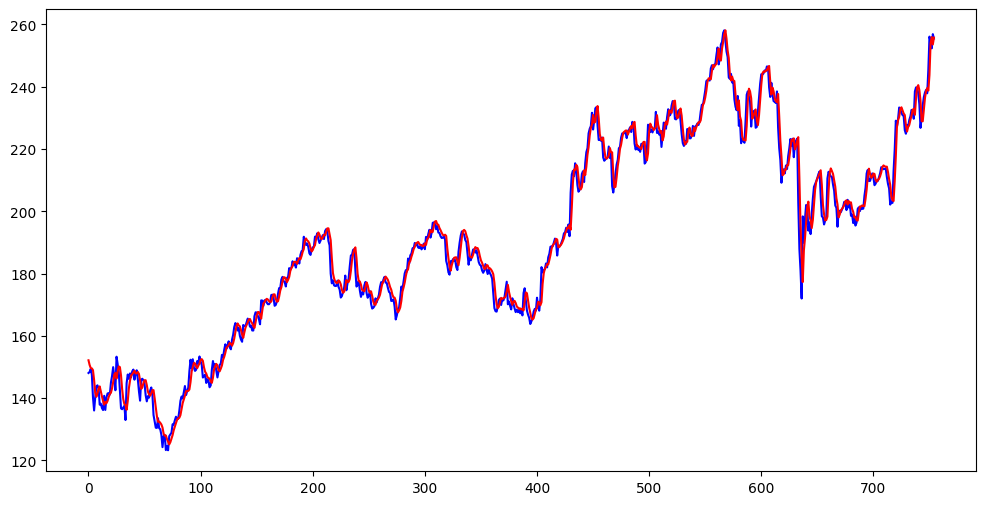

In [41]:
plt.figure(figsize=(12,6))
plt.plot(y_test, 'b', label='original price')
plt.plot(y_predicted, 'r', label='predictions')

# Model Evaluation

In [42]:
# Mean Squared Error (MSE)
from sklearn.metrics import mean_squared_error

In [43]:
mse = mean_squared_error(y_test, y_predicted)
print(f"Mean Squared Error: {mse}")

Mean Squared Error: 13.723398870092952


In [44]:
# Root Mean Squared Error (RMSE)
rmse = np.sqrt(mse)
print(f"Root Mean Squared Error: {rmse}")

Root Mean Squared Error: 3.704510611415893


In [45]:
# R-Squared
from sklearn.metrics import r2_score
r2 = r2_score(y_test, y_predicted)
print(f"R2 Score: {r2}")

R2 Score: 0.9865708008170156
